## Scikit-learn practice on python 

### Reading the example of dataset.
As the example of the dataset, read the iris dataset, which is well known to the simple flower 'iris' dataset.

In [7]:
from sklearn import datasets
iris = datasets.load_iris()

In [10]:
print(iris.data.shape) # the shape of iris dataset (n_samples, n_features)
print(iris.target.shape) # the length of n_samples

(150, 4)
(150,)


In [12]:
digits = datasets.load_digits() # the image dataset of hand-written digits
digits.images.shape

(1797, 8, 8)

### Training and estimating
Scikit-learn creates the extimator from exist data and call fit(X,Y) method. Then, it can learn datasets.

In [15]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(iris.data, iris.target)
clf.predict([[5.0, 3.6, 1.3, 0.25]])
clf.coef_

/Users/naokimaekawa/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/naokimaekawa/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[ 0.18423607,  0.45122147, -0.8079446 , -0.45071281],
       [ 0.05569751, -0.90008843,  0.40866531, -0.95995516],
       [-0.8507112 , -0.98661203,  1.38102801,  1.86533225]])

### Classification 
#### KNN (k-nearest neighbors) classification

In [20]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(iris.data, iris.target)
knn.predict([[0.1, 0.2, 0.3, 0.4]])

KNeighborsClassifier(n_neighbors=Ellipsis)

#### Classification by SVM (Support Vector Machine) 

In [58]:
from sklearn import svm
from sklearn.model_selection import train_test_split

import numpy as np
# perm = np.random.permutation(iris.target.size)
# iris.data = iris.data[perm]
# iris.target = iris.target[perm]
data_train, data_test, target_train, target_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=1)

linear = svm.SVC(kernel='linear')
linear.fit(data_train, target_train)
print('linear:', linear.score(data_test, target_test))

poly = svm.SVC(kernel='poly')
poly.fit(data_train, target_train)
print('poly:', poly.score(data_test, target_test))

rbf = svm.SVC(kernel='rbf')
rbf.fit(data_train, target_train)
print('RBF:', rbf.score(data_test, target_test))

linear: 0.8666666666666667
poly: 0.8
RBF: 0.8


### Clustering

#### K-means clustering

In [67]:
from sklearn import cluster, datasets

iris = datasets.load_iris()
k_means = cluster.KMeans(n_clusters=4) # Execute the k-means clustering with deciding the number of clusters to divide.
k_means.fit(iris.data)

print(k_means.labels_[::10]) # The result of k-means classification
print(iris.target[::10]) # The answer labels of original iris datasets

[1 1 1 1 1 2 3 2 3 3 0 2 0 0 0]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


##### Application to the compressing the size of images

CLustering is also useful as the method of choosing the small amount of information from the original datasets.

/var/folders/25/9b_gpl490w9ffmj63bfx0z2r0000gn/T/ipykernel_9693/862363901.py:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True).astype(np.float32)


KMeans(n_clusters=10)

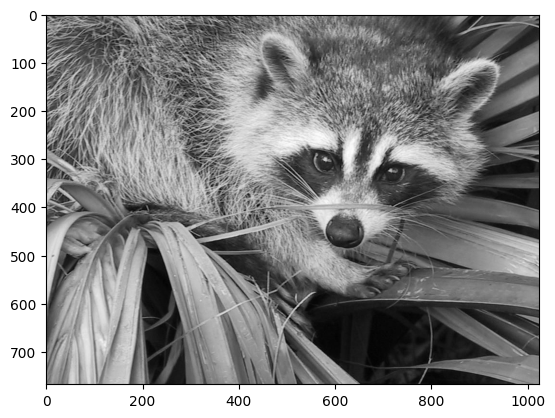

In [78]:
from scipy import misc
import matplotlib.pyplot as plt

face = misc.face(gray=True).astype(np.float32)
plt.gray()
plt.imshow(face)

X = face.reshape((-1, 1))
k_means = cluster.KMeans(n_clusters=10)
k_means.fit(X)

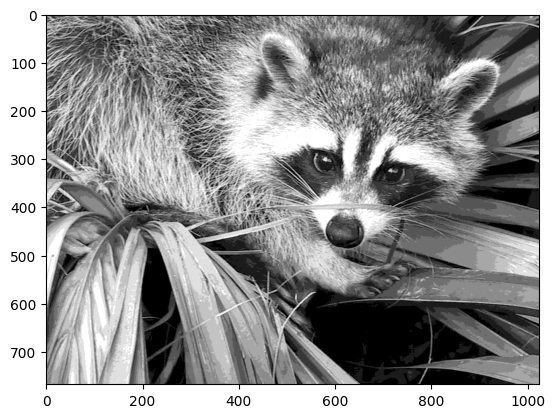

In [79]:
# Compress the image

values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

plt.imshow(face_compressed)

### Dimensional decomposition by PCA (Principal Component Analysis)

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(iris.data)
PCA(copy=True, n_components=2)
X = pca.transform(iris.data)

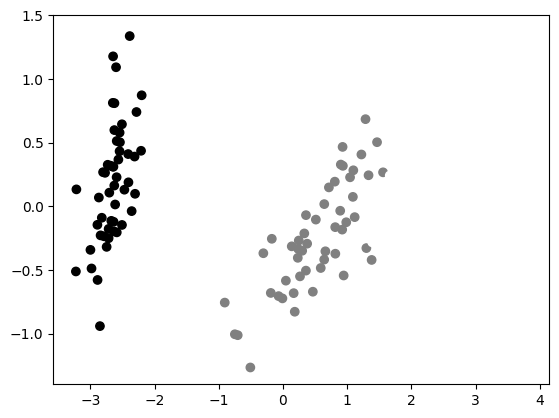

In [93]:
# Visualize the reshaped iris dataset
plt.scatter(X[:, 0], X[:, 1], c=iris.target)

### Face recognition
This chapter deals with the example of the face recognition with the decomposition by PCA and the SVM classification.

In [115]:
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load data
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)
faces = np.reshape(lfw_people.data, (lfw_people.target.shape[0], -1))

# Split the train and test from datasets.
X_train, X_test, y_train, y_test = train_test_split(faces, lfw_people.target, test_size=0.3, random_state=1)

# Dimensional reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Classification
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

# X_test_pca.shape, y_test.shape
# print(f'Score on unseen data:{clf.score(X_test_pca, y_test)}')

print(f'scores: {clf.score(X_test_pca, y_test)}')

for i in range(10):
    print(lfw_people.target_names[clf.predict(X_test_pca[i])[0]])
    _ = plt.imshow(X_test[i].reshape(50, 37), cmap=plt.cm.gray)

scores: 0.6511627906976745


ValueError: Expected 2D array, got 1D array instead:
array=[ 3.69803786e-01  1.99398232e+00  1.56353903e+00  1.12047493e+00
  4.04429615e-01 -3.02881747e-01 -9.47380662e-01  1.67483962e+00
  3.52250338e-01 -7.65280128e-01  7.30970323e-01  1.15429914e+00
 -4.52199757e-01  7.76814282e-01 -8.18928063e-01  5.06174207e-01
 -1.04602560e-01 -1.21769726e-01 -4.03144360e-01  7.91083723e-02
 -5.16036153e-02 -7.48017728e-01  1.91232935e-01 -3.30951095e-01
 -3.34923029e-01  3.39016318e-01 -3.70074183e-01 -5.41892469e-01
  2.80845404e-01 -1.55195570e+00  6.05521798e-01  8.79203528e-02
  2.71540016e-01 -2.70014815e-03 -3.28191847e-01  3.27004880e-01
 -1.95710331e-01 -2.73877800e-01  1.53224766e-01  1.30683154e-01
 -2.22742021e-01  1.50272533e-01 -6.53948426e-01  3.46680552e-01
  3.79766524e-02  4.65585113e-01 -1.84018627e-01  1.16975039e-01
 -2.44257331e-01  2.19687670e-01 -4.89020765e-01 -3.60111773e-01
  2.33167395e-01 -3.08564037e-01  8.03660274e-01 -1.45646244e-01
 -1.42457932e-01 -1.67760238e-01 -1.32477462e-01  2.43924074e-02
 -2.02855244e-01  3.06438416e-01  1.34413630e-01  2.14526385e-01
  1.33926898e-01 -1.32327124e-01 -1.24282509e-01  2.06441611e-01
  5.38201034e-01  1.46970570e-01 -1.87443614e-01  4.17226225e-01
  1.69446200e-01 -2.86012366e-02  7.37703890e-02  1.31506592e-01
 -4.22454059e-01 -3.47206712e-01  1.32134497e-01  3.72851789e-01
 -1.08303174e-01 -1.97736442e-01 -2.38307625e-01  1.99272633e-02
  1.77644789e-01 -6.97085187e-02 -2.25513697e-01  4.99516487e-01
  2.59400934e-01  4.76076126e-01  3.35114926e-01  3.41344148e-01
 -2.22989485e-01  1.23721808e-02  1.08653188e-01 -2.20524352e-02
 -1.30125880e-01  5.65053374e-02  8.38713795e-02 -1.58508345e-02
 -2.06489459e-01 -2.31054187e-01  3.19161713e-01  3.68376017e-01
 -6.14951029e-02  1.83616921e-01  5.89506701e-03 -3.73829931e-01
 -2.95808166e-01 -3.69154066e-01  1.99496925e-01  1.73972830e-01
  4.48311150e-01 -2.84202516e-01  3.59105170e-02 -2.11760432e-01
 -2.34816909e-01  3.65660906e-01 -8.46858993e-02 -7.94057921e-02
 -9.61084068e-02 -2.81225920e-01 -2.44869124e-02  8.74451920e-02
  1.76048204e-02 -1.07419707e-01 -1.30792409e-02 -8.89405161e-02
  6.21120870e-01 -2.47435167e-01  1.81889638e-01  2.23559037e-01
  5.88932335e-02  6.38962910e-03 -1.79148942e-01  4.90805030e-01
  5.36339544e-02 -8.75723436e-02 -1.18926615e-01  2.22090468e-01
  2.53658265e-01  1.45615414e-01 -8.00566822e-02 -3.48573029e-01
  1.32776573e-01 -3.71142626e-02 -8.12727213e-02 -2.93149471e-01
  5.02144098e-01 -1.25112131e-01  1.16070271e-01  1.70956641e-01
 -6.18787743e-02  8.56802240e-02  3.85262698e-01 -2.01073825e-01
 -6.01423979e-02  2.14801833e-01  1.46107282e-03  1.77631065e-01
 -2.02002674e-02 -2.17082202e-01 -3.64088118e-01 -1.07505783e-01
  1.29791554e-02  2.02762127e-01 -3.10186744e-01 -1.32947229e-04
 -3.93309772e-01  2.29040235e-01  1.47594571e-01  5.34630716e-01
 -3.70515764e-01 -6.90631717e-02  3.15920234e-01 -2.33534217e-01
 -7.93233067e-02  1.08795181e-01  1.34956941e-01  1.15311801e-01
  1.28133208e-01  2.02274799e-01 -1.56065226e-02 -2.74226934e-01
  2.18754858e-01  1.98685527e-02  9.22756046e-02 -1.69232458e-01
 -3.60750645e-01  1.96255982e-01  2.07726285e-01  1.01953119e-01
 -7.59093761e-02 -1.35466844e-01  7.69721717e-02  3.87106389e-02
 -1.08181611e-01 -2.44995117e-01  5.00167087e-02  1.21420860e-01
  7.57409632e-03  2.43928403e-01 -7.26966783e-02  1.31971598e-01
 -6.28821924e-02 -9.59832445e-02  2.73240834e-01 -2.10572779e-02
 -3.84452194e-01  6.40171245e-02  1.26923155e-02 -2.97346711e-01
 -7.81059265e-02  6.88384995e-02 -3.25600691e-02  4.65708114e-02
 -2.43928626e-01 -8.81279856e-02  1.77402616e-01 -2.86278158e-01
 -1.57277048e-01  4.82034683e-03 -7.10483193e-02 -6.68927431e-02
 -1.25753909e-01  2.91762091e-02  1.31263077e-01  3.03984940e-01
 -2.89310277e-01  1.01406090e-01 -3.96609306e-04  8.82377550e-02
  4.90434170e-02  1.23195276e-02 -1.77176893e-02 -1.90852806e-02
 -8.40407386e-02  5.08025438e-02  5.00326641e-02  1.40670791e-01
  6.41565025e-03  1.54662192e-01 -2.16521639e-02 -1.22683935e-01
 -6.42469674e-02 -2.15604812e-01 -1.17795303e-01 -4.01599780e-02
  2.22605616e-01 -7.27291405e-02  1.34584874e-01 -2.67967790e-01
  1.50908828e-02  2.93269485e-01 -3.34289856e-03 -7.59021938e-02
 -5.07995114e-03 -1.65997017e-02 -2.75300801e-01 -5.56202717e-02
 -2.87373364e-02 -1.35023519e-02 -6.45918474e-02  1.88828073e-02
  6.34374917e-02 -8.16461146e-02  1.63257644e-02 -2.74710298e-01
 -6.52544796e-02  2.82707512e-02  7.54861534e-02 -2.91422814e-01
 -3.33453827e-02 -7.95804262e-02 -1.85241312e-01 -1.21902674e-01
  1.89901367e-02 -2.25894302e-02 -1.44964866e-02  1.02518767e-01
 -1.00821555e-01 -1.49908945e-01 -1.12562897e-02  6.66331872e-03
  1.88940078e-01 -1.95948377e-01 -1.74043309e-02 -7.69677944e-03
  1.07690208e-01  2.54747778e-01  7.54834116e-02 -2.81484164e-02
 -3.80558893e-02  1.90827370e-01 -4.64305058e-02 -6.27648383e-02
  2.22604014e-02  6.25757724e-02 -9.70575735e-02  2.92624906e-02
  1.45600170e-01  2.76776627e-02 -1.46401882e-01  1.58000857e-01
 -1.03296056e-01  2.89538875e-03  6.68511465e-02  3.91016871e-01
  2.12029338e-01  1.18927971e-01 -1.68596935e-02 -6.73986748e-02
 -1.65238202e-01  1.10418528e-01  1.30399048e-01 -2.83051468e-03
  3.28698158e-02  6.68755546e-02  7.82092065e-02 -2.59820431e-01
  5.66873848e-02  1.52590334e-01  6.33037090e-03  8.82668942e-02
 -3.83226685e-02 -2.29012705e-02 -1.15141541e-01  1.21134102e-01
 -5.38568422e-02  8.48845467e-02 -3.17976475e-02 -7.18320161e-03
  5.54698817e-02  1.47108048e-01  1.89217076e-01  1.23823322e-02
 -4.33051288e-02 -4.29278351e-02  1.22347996e-02 -1.96500853e-01
 -4.72978503e-03  1.29403576e-01  1.24780387e-02  3.15743685e-02
 -3.94357853e-02 -7.91702345e-02 -2.45372877e-02 -5.17244712e-02
  1.63362876e-01  1.48197766e-02 -3.45754251e-02  1.53639257e-01
  1.00862026e-01 -1.24989912e-01 -1.78924546e-01  1.04636818e-01
  2.10979134e-01 -6.47246987e-02 -5.57631403e-02  1.07392430e-01
  1.96485713e-01  4.16240655e-02 -7.64314681e-02 -2.18309760e-01
 -6.08654916e-02  1.40504926e-01 -4.99307737e-02 -4.26560715e-02
 -1.84921756e-01  2.57004127e-02 -1.50455549e-01  7.10129067e-02
 -1.34665787e-01 -1.00536950e-01 -6.42059892e-02  5.22696637e-02
  3.04124542e-02  1.57234818e-01 -1.66787747e-02 -1.69466108e-01
  1.59513816e-01  1.92395538e-01 -8.04714411e-02 -2.56399542e-01
 -1.90097407e-01  1.78622231e-02  2.02226453e-02 -1.19969845e-01
  4.84365262e-02 -7.94205889e-02 -8.00398588e-02 -7.68011734e-02
  1.23740122e-01 -8.44088197e-03 -6.16049096e-02 -4.73853871e-02
 -9.17630568e-02 -4.87736203e-02 -1.55899286e-01 -5.95098883e-02
  4.43163142e-02 -5.10827340e-02 -4.92128208e-02  9.06057954e-02
 -1.04326352e-01 -9.35429633e-02  9.61130336e-02  7.71601824e-03
 -2.07604542e-02 -7.59571195e-02 -9.63691995e-03  5.39589189e-02
  2.66945660e-02  2.72986516e-02 -2.02406049e-01 -7.61398226e-02
 -8.71935859e-02  2.29340363e-02 -2.03804262e-02 -5.37235886e-02
  2.00653374e-02 -2.80590542e-02 -1.33625958e-02 -1.14869401e-02
 -6.29604831e-02 -4.33654226e-02  8.30683634e-02  1.61973059e-01
  4.54567783e-02 -3.49665247e-02  1.57324001e-02  4.59302962e-02
  6.62376285e-02 -6.07697293e-02 -1.48011073e-01  4.91421595e-02
 -5.11611849e-02 -2.97083165e-02  1.58581987e-01  1.80164427e-02
  7.59131461e-02 -7.57546127e-02  5.47646955e-02 -6.86747208e-03
  1.58067793e-01 -3.84625569e-02  6.65451139e-02  8.29580724e-02
  1.77426040e-01 -7.98531920e-02 -1.22701205e-01 -1.22952797e-02
 -2.81146262e-02 -3.53839248e-04 -5.51798083e-02 -6.53308854e-02
  2.22844779e-02  6.53764158e-02 -1.34439573e-01  2.31839642e-02
  3.18882912e-02  2.66493000e-02  5.14337607e-02 -2.44226754e-02
  2.60137338e-02 -4.80724126e-03  2.30500758e-01 -9.85277593e-02
  7.95187503e-02 -1.81121379e-02 -5.43736368e-02  2.60942001e-02
  5.94048947e-02 -9.09782350e-02  4.01831232e-02 -6.25233129e-02
  5.26914001e-02 -9.32163745e-03 -1.93222612e-03  9.19194743e-02
 -1.73810139e-01  9.40831751e-02 -2.50830442e-01 -1.26421928e-01
  1.88311860e-02  2.28844099e-02 -3.79778445e-04 -2.70461068e-02
 -1.38629377e-01 -1.16215460e-01  9.46231410e-02 -1.77849844e-01
  2.46025156e-02  1.43927589e-01  3.12295724e-02 -1.30126387e-01
  2.31357422e-02  1.05719283e-01 -3.79463062e-02  4.24339883e-02
 -2.96614058e-02  1.04830794e-01  6.44993335e-02  6.61978498e-02
  1.32057920e-01 -1.56588554e-02  5.06885815e-03 -8.65482837e-02
  2.51710471e-02 -4.95947152e-02  1.47844747e-01  4.66156099e-03
 -1.00346148e-01  1.25745118e-01  8.07387084e-02 -1.04431272e-01
 -1.12368260e-02 -5.48953936e-02  3.59643772e-02  2.18446124e-02
  3.07068229e-03 -1.10669531e-01 -1.30262062e-01  1.03178725e-01
  8.74191001e-02 -2.70402506e-02  1.06182493e-01 -7.90186971e-03
  1.25172541e-01  4.15084660e-02  6.11410588e-02 -1.54633790e-01
  1.01621792e-01 -1.20440573e-02 -1.12511493e-01 -6.19216040e-02
 -1.15755647e-01  1.57376509e-02  5.67314476e-02  4.51614708e-02
 -7.75135234e-02 -2.11681843e-01  1.09913684e-02 -8.74561220e-02
  3.83842662e-02 -6.16248697e-02 -3.40650231e-02 -3.06581259e-02
 -2.09764242e-02 -9.96394530e-02  4.78064641e-02 -3.29443291e-02
  1.76714305e-02 -3.03608682e-02 -1.81536481e-01 -8.99841934e-02
 -1.52436659e-01  1.65314265e-02  1.11580268e-02 -8.78086239e-02
 -9.68011022e-02 -7.70387948e-02  5.04586138e-02 -1.19731769e-01
  1.69069350e-01  2.16833316e-02 -5.10220788e-02  1.31554589e-01
  2.98906453e-02  7.19411373e-02  3.75128984e-02 -6.16175234e-02
  1.77123457e-01  7.33122975e-02 -9.36976373e-02 -1.34639069e-01
 -1.74906161e-02 -9.69302356e-02  9.44092572e-02  7.71578327e-02
  2.75536142e-02  1.09172538e-02 -6.27191663e-02 -2.06228457e-02
 -2.32341327e-03 -7.03750029e-02 -4.44541499e-03  2.44846083e-02
 -7.95360655e-02 -5.55198714e-02 -9.64836497e-03 -1.43842753e-02
 -1.07214265e-02  3.41774821e-02 -3.50261591e-02  2.67915428e-03
 -1.21816874e-01 -1.53294981e-01 -3.72663923e-02 -6.36053309e-02
  6.34420961e-02  2.04034094e-02  1.62372403e-02 -2.84361839e-02
 -3.16909179e-02  5.81036042e-03  3.08845881e-02 -4.47658934e-02
 -7.28150457e-02  1.53024644e-02  3.91526781e-02 -2.25650221e-02
 -5.12010902e-02 -7.82616511e-02 -1.90404970e-02 -2.43091695e-02
  1.29514784e-01 -4.92094457e-03  3.50974575e-02  2.72996183e-02
 -5.02970889e-02  5.40799238e-02  7.59599172e-03 -5.96054345e-02
 -4.70760539e-02 -8.30758214e-02 -2.71892529e-02  6.63797706e-02
 -3.67668569e-02  8.76537785e-02 -4.58652079e-02 -3.84721346e-03
  6.67355061e-02 -1.11811146e-01 -9.58509445e-02  3.93267423e-02
 -1.24704316e-01 -1.51932351e-02 -8.05123057e-03 -2.79984325e-02
 -3.34349163e-02  5.55758141e-02 -2.55106553e-03  4.66523618e-02
 -4.92820591e-02  5.17708585e-02 -7.09972158e-03  8.87214392e-02
 -1.55683560e-02 -4.78449240e-02 -2.91929040e-02 -5.06053045e-02
 -6.98367432e-02  7.79630430e-03 -1.19594142e-01 -4.82031554e-02
  7.28621781e-02 -3.42547670e-02  1.50744682e-02  2.33258251e-02
  4.80426848e-03 -1.39684349e-01 -2.63290945e-02  6.57285601e-02
  9.04061794e-02  4.73052487e-02  5.38024008e-02  2.43175551e-02
 -7.75595196e-04  4.27456945e-03 -8.77578259e-02 -1.02388881e-01
 -4.99643683e-02  3.61970812e-02 -1.00912638e-02 -1.18369004e-02
  1.04468269e-02  4.21099830e-03 -2.09909622e-02 -7.76100159e-03
  1.35288015e-03 -5.65156862e-02  3.35715003e-02 -5.69949970e-02
  7.46507943e-03 -5.07745706e-03  2.00580135e-02  1.04834259e-01
 -2.61513586e-03 -3.05558108e-02 -2.97207739e-02 -2.27779597e-02
 -9.96080190e-02 -1.39699411e-02  1.21344246e-01  6.82261959e-03
  1.08664572e-01  1.11774847e-01  3.68586443e-02  4.01954651e-02
 -1.14375308e-01  9.61587019e-03 -5.43641523e-02  1.00335348e-02
  1.81001574e-02 -4.00016122e-02  2.93077473e-02 -5.02569266e-02
  5.53333908e-02 -3.41597162e-02 -2.95258462e-02 -5.40610589e-02
 -1.22990407e-01 -1.19975761e-01  2.36928761e-02  1.14091247e-01
 -4.13975120e-02 -1.21260723e-02  4.42724824e-02  2.75864340e-02
 -9.42124128e-02 -6.17528409e-02  1.03638113e-01 -5.13429493e-02
 -6.18172064e-02 -7.21436925e-04  6.46787882e-02 -4.81975600e-02
 -1.38094854e-02 -9.57628042e-02  4.59105894e-02 -5.45525923e-02
 -5.92656434e-04 -7.89955705e-02  1.09404080e-01  2.27352176e-02
  1.41059756e-02 -8.60227272e-03 -5.96470237e-02  1.46007627e-01
  1.49557227e-02  6.24259189e-02 -5.19826040e-02 -1.91875957e-02
 -3.55641870e-03  2.17265263e-02 -6.29524514e-02  3.86936590e-03
 -1.32348156e-03  5.93340620e-02  1.64953396e-02  1.15771540e-01
 -4.02626805e-02  3.48490849e-02  3.37128267e-02 -2.45119445e-02
  5.11667207e-02 -7.88780823e-02 -1.57383718e-02  8.30521882e-02
 -7.07460418e-02  7.35375881e-02  1.79381028e-01  5.07127270e-02
 -6.66065700e-03  3.86938155e-02 -4.01479602e-02  3.47196832e-02
  3.10257282e-02  1.65631808e-03 -1.34812579e-01 -1.80818141e-04
 -6.06355779e-02 -8.37920308e-02  4.27131876e-02 -1.60115678e-02
  1.07202984e-01  5.52227013e-02  2.54213363e-02 -7.42657436e-03
  1.23981349e-01  4.40445617e-02 -1.45061892e-02  7.06388280e-02
  4.54105474e-02 -8.13058764e-02  3.05715855e-02 -3.89704816e-02
 -5.24535254e-02  7.54964724e-02 -4.62362841e-02  1.41564198e-03
  3.31887230e-02  6.14922196e-02 -1.79006495e-02 -4.82129306e-02
 -2.02143695e-02  5.81554174e-02  1.08664557e-01  4.71575521e-02
 -1.90306045e-02 -2.07907259e-02 -5.18803373e-02 -1.03297584e-01
  5.51473722e-02  6.58514425e-02  5.14637157e-02  6.99928403e-03
 -5.61264008e-02  1.85531247e-02 -5.51662780e-02 -3.39672118e-02
 -4.24073264e-02 -8.55239779e-02 -5.25786355e-02 -5.03973886e-02
  1.16865663e-02 -9.53508690e-02  1.73086990e-02  2.24022530e-02
  3.62600386e-02  3.64067554e-02  9.82074589e-02 -6.64694980e-02
  5.95877804e-02  2.88765486e-02 -4.08001989e-02  7.09193945e-02
  1.48144178e-02 -2.68965438e-02  6.32344410e-02 -1.75881535e-02
  1.61194243e-02  3.54367569e-02  1.05933929e-02 -2.11013481e-02
 -3.49270254e-02 -2.11167969e-02  1.99765563e-02 -1.07584205e-02
  1.32039577e-01  2.02461816e-02 -4.33890671e-02  9.82974656e-03
 -2.81699002e-02  3.86941619e-03 -4.44375649e-02  9.81110781e-02
  6.21693134e-02 -1.76194943e-02 -4.11764085e-02  4.27197739e-02
 -4.58400771e-02 -6.18156344e-02  1.06530292e-02  2.92540528e-04
  3.39282975e-02  1.36550546e-01  2.25530006e-03 -9.92047787e-02
  3.95926051e-02  3.30759287e-02  2.74503939e-02  7.29321875e-03
  3.90567183e-02  2.25750264e-02  2.89857872e-02 -2.69912705e-02
 -4.20281105e-02  4.20018546e-02  2.69164704e-03  4.47103158e-02
 -7.58927912e-02  2.93369945e-02 -2.52912957e-02 -2.16886401e-05
  7.09738433e-02 -2.40242891e-02 -1.14975534e-02 -7.00995699e-02
  4.11156937e-03  8.45545456e-02  3.39972004e-02  3.79574709e-02
 -3.48137575e-03 -1.53585486e-02 -6.71263561e-02  9.12514050e-03
  6.95436895e-02  6.20662719e-02 -2.80333385e-02 -1.11870393e-02
  5.10224178e-02  5.10108843e-03 -2.03169659e-02  2.71380618e-02
 -7.01025948e-02 -2.32497323e-02  4.85684350e-03  5.99931926e-04
 -3.90911028e-02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Linear model: from regression to sparcity
In this chapter, we deal with the diabetes datasets.

In [131]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=.2, random_state=1)

#### Space model
To revise the condition of model, such as unimportant variables, relaxing the carse of dimension, pre-processing of pre-feature selection and so on, select important only important features and set other features as zero. This method is called as Sparce method.

In [134]:
from sklearn import linear_model
regr = linear_model.Lasso(alpha=.3)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.4224494036251901

### Select models: select estimator and parameters

#### Grid search

In [144]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

digits = datasets.load_digits()
gammas = np.logspace(-6, -1, 10)
svc = svm.SVC()
clf = GridSearchCV(estimator=svc, param_grid=dict(gamma=gammas),n_jobs=-1)
clf.fit(digits.data[:1000], digits.target[:1000])

clf.best_score_, clf.best_estimator_.gamma


(0.9629999999999999, 0.0021544346900318843)

#### Cross estimator

In [156]:
from sklearn import linear_model

lasso = linear_model.LassoCV(alphas=None)
diabetes = datasets.load_diabetes()
X_train = diabetes.data
y_train = diabetes.target
lasso.fit(X_train, y_train)
lasso.alpha_

0.003753767152691846